In [128]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [135]:
#linear_model, lstm_model, dnn_model,  df_all_chan,input_columns  = d2d.import_data(filename = "/home/jmanos/notebooks/Non_filtered_rhone_v2/Rhone_data_continuous_nofilt.h5")
#linear_model, lstm_model, dnn_model,  df_all_chan,input_columns  = d2d.import_data(filename = "/home/jmanos/notebooks/Lowpass_data/Rhone_data_continuous_lowpass.h5")
linear_model, lstm_model, dnn_model,  df_all_chan,input_columns  = d2d.import_data(filename = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5")

da = df_all_chan.to_numpy()

Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


In [130]:
window_input_width = 200

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
    input_width=window_input_width, label_width=1, shift=0,
    label_columns=['Discharge'],
    input_columns=input_columns,
    shuffle=True)

<TakeDataset shapes: ((None, 200, 2308), (None, 1, 1)), types: (tf.float32, tf.float32)>
<TakeDataset shapes: ((None, 200, 2308), (None, 1, 1)), types: (tf.float32, tf.float32)>
<SkipDataset shapes: ((None, 200, 2308), (None, 1, 1)), types: (tf.float32, tf.float32)>
(1, 25, 200, 2308)
(1, 25, 1, 1)


In [131]:
print(window_shuffle.example)

(<tf.Tensor: shape=(32, 200, 2308), dtype=float32, numpy=
array([[[ 1.75073206e-01,  1.97104681e-02,  3.14709157e-01, ...,
         -5.83382010e-01, -2.87505209e-01, -1.24899596e-01],
        [ 1.12460554e+00,  4.06408042e-01,  1.19788814e+00, ...,
         -5.90159655e-01,  2.68802881e-01,  3.49408865e-01],
        [-3.09579611e-01,  7.26719201e-01,  8.95253658e-01, ...,
         -4.29763377e-01,  4.19512182e-01,  3.83625656e-01],
        ...,
        [-1.51182413e+00, -1.89038599e+00, -3.68496251e+00, ...,
          4.62898588e+00,  4.63779330e-01, -3.47167104e-02],
        [-3.64115810e+00, -3.34404898e+00, -4.26263237e+00, ...,
          2.37240481e+00, -8.31310228e-02, -4.95621741e-01],
        [-2.40290475e+00, -6.11709356e-01, -3.79103804e+00, ...,
          2.38780427e+00,  3.13227236e-01, -3.65619898e-01]],

       [[ 1.55733973e-01, -1.23683727e+00, -5.41253760e-02, ...,
          1.33137155e+00,  1.24381340e+00,  2.38707876e+00],
        [ 6.34027183e-01,  9.35294926e-01,  3

In [132]:
history = {}
val_performance = {}
performance = {}

In [133]:
history['linear_'+str(window_input_width)] = d2d.compile_and_fit(linear_model, multi_step_window_shuffled, learning_rate = 0.001)
history['dnn_'+str(window_input_width)] = d2d.compile_and_fit(dnn_model, multi_step_window_shuffled, learning_rate = 0.001)
history['lstm_'+str(window_input_width)] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)
#history['conv_'+str(width)] = d2d.compile_and_fit(conv_model, multi_step_window_shuffled, learning_rate = 0.001)

val_performance['lstm_'+str(window_input_width)] = lstm_model.evaluate(multi_step_window_shuffled.val)
performance['lstm_'+str(window_input_width)] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)

val_performance['linear_'+str(window_input_width)] = linear_model.evaluate(multi_step_window_shuffled.val)
performance['linear_'+str(window_input_width)] = linear_model.evaluate(multi_step_window_shuffled.test, verbose=0)

val_performance['dnn_'+str(window_input_width)] = dnn_model.evaluate(multi_step_window_shuffled.val)
performance['dnn_'+str(window_input_width)] = dnn_model.evaluate(multi_step_window_shuffled.test, verbose=0)


Epoch 1/100
7/7 [==============================] - 1s 82ms/step - loss: 59895.9648 - mean_absolute_error: 159.8714 - val_loss: 43834.1094 - val_mean_absolute_error: 155.7923
Epoch 2/100
7/7 [==============================] - 0s 75ms/step - loss: 42230.3242 - mean_absolute_error: 128.2049 - val_loss: 37398.1953 - val_mean_absolute_error: 156.4227
Epoch 3/100
7/7 [==============================] - 0s 72ms/step - loss: 54304.1133 - mean_absolute_error: 148.2458 - val_loss: 12416.1064 - val_mean_absolute_error: 53.3020
Epoch 4/100
7/7 [==============================] - 0s 72ms/step - loss: 16811.0488 - mean_absolute_error: 71.3081 - val_loss: 5332.5742 - val_mean_absolute_error: 56.4516
Epoch 5/100
7/7 [==============================] - 0s 73ms/step - loss: 4997.2861 - mean_absolute_error: 47.9619 - val_loss: 3019.6707 - val_mean_absolute_error: 46.3714
Epoch 6/100
7/7 [==============================] - 0s 74ms/step - loss: 4852.6475 - mean_absolute_error: 51.7045 - val_loss: 928.5443 - va

7/7 [==============================] - 1s 130ms/step - loss: 0.0953 - mean_absolute_error: 0.1446 - val_loss: 0.1897 - val_mean_absolute_error: 0.2353
Epoch 38/100
7/7 [==============================] - 1s 130ms/step - loss: 0.0968 - mean_absolute_error: 0.1528 - val_loss: 0.1837 - val_mean_absolute_error: 0.2269
Epoch 39/100
7/7 [==============================] - 1s 131ms/step - loss: 0.0935 - mean_absolute_error: 0.1423 - val_loss: 0.1813 - val_mean_absolute_error: 0.2272
Epoch 40/100
7/7 [==============================] - 1s 130ms/step - loss: 0.0943 - mean_absolute_error: 0.1471 - val_loss: 0.1840 - val_mean_absolute_error: 0.2328
Epoch 41/100
7/7 [==============================] - 1s 128ms/step - loss: 0.0925 - mean_absolute_error: 0.1454 - val_loss: 0.1775 - val_mean_absolute_error: 0.2163
Epoch 42/100
7/7 [==============================] - 1s 128ms/step - loss: 0.0960 - mean_absolute_error: 0.1392 - val_loss: 0.1761 - val_mean_absolute_error: 0.2235
Epoch 43/100
7/7 [===========

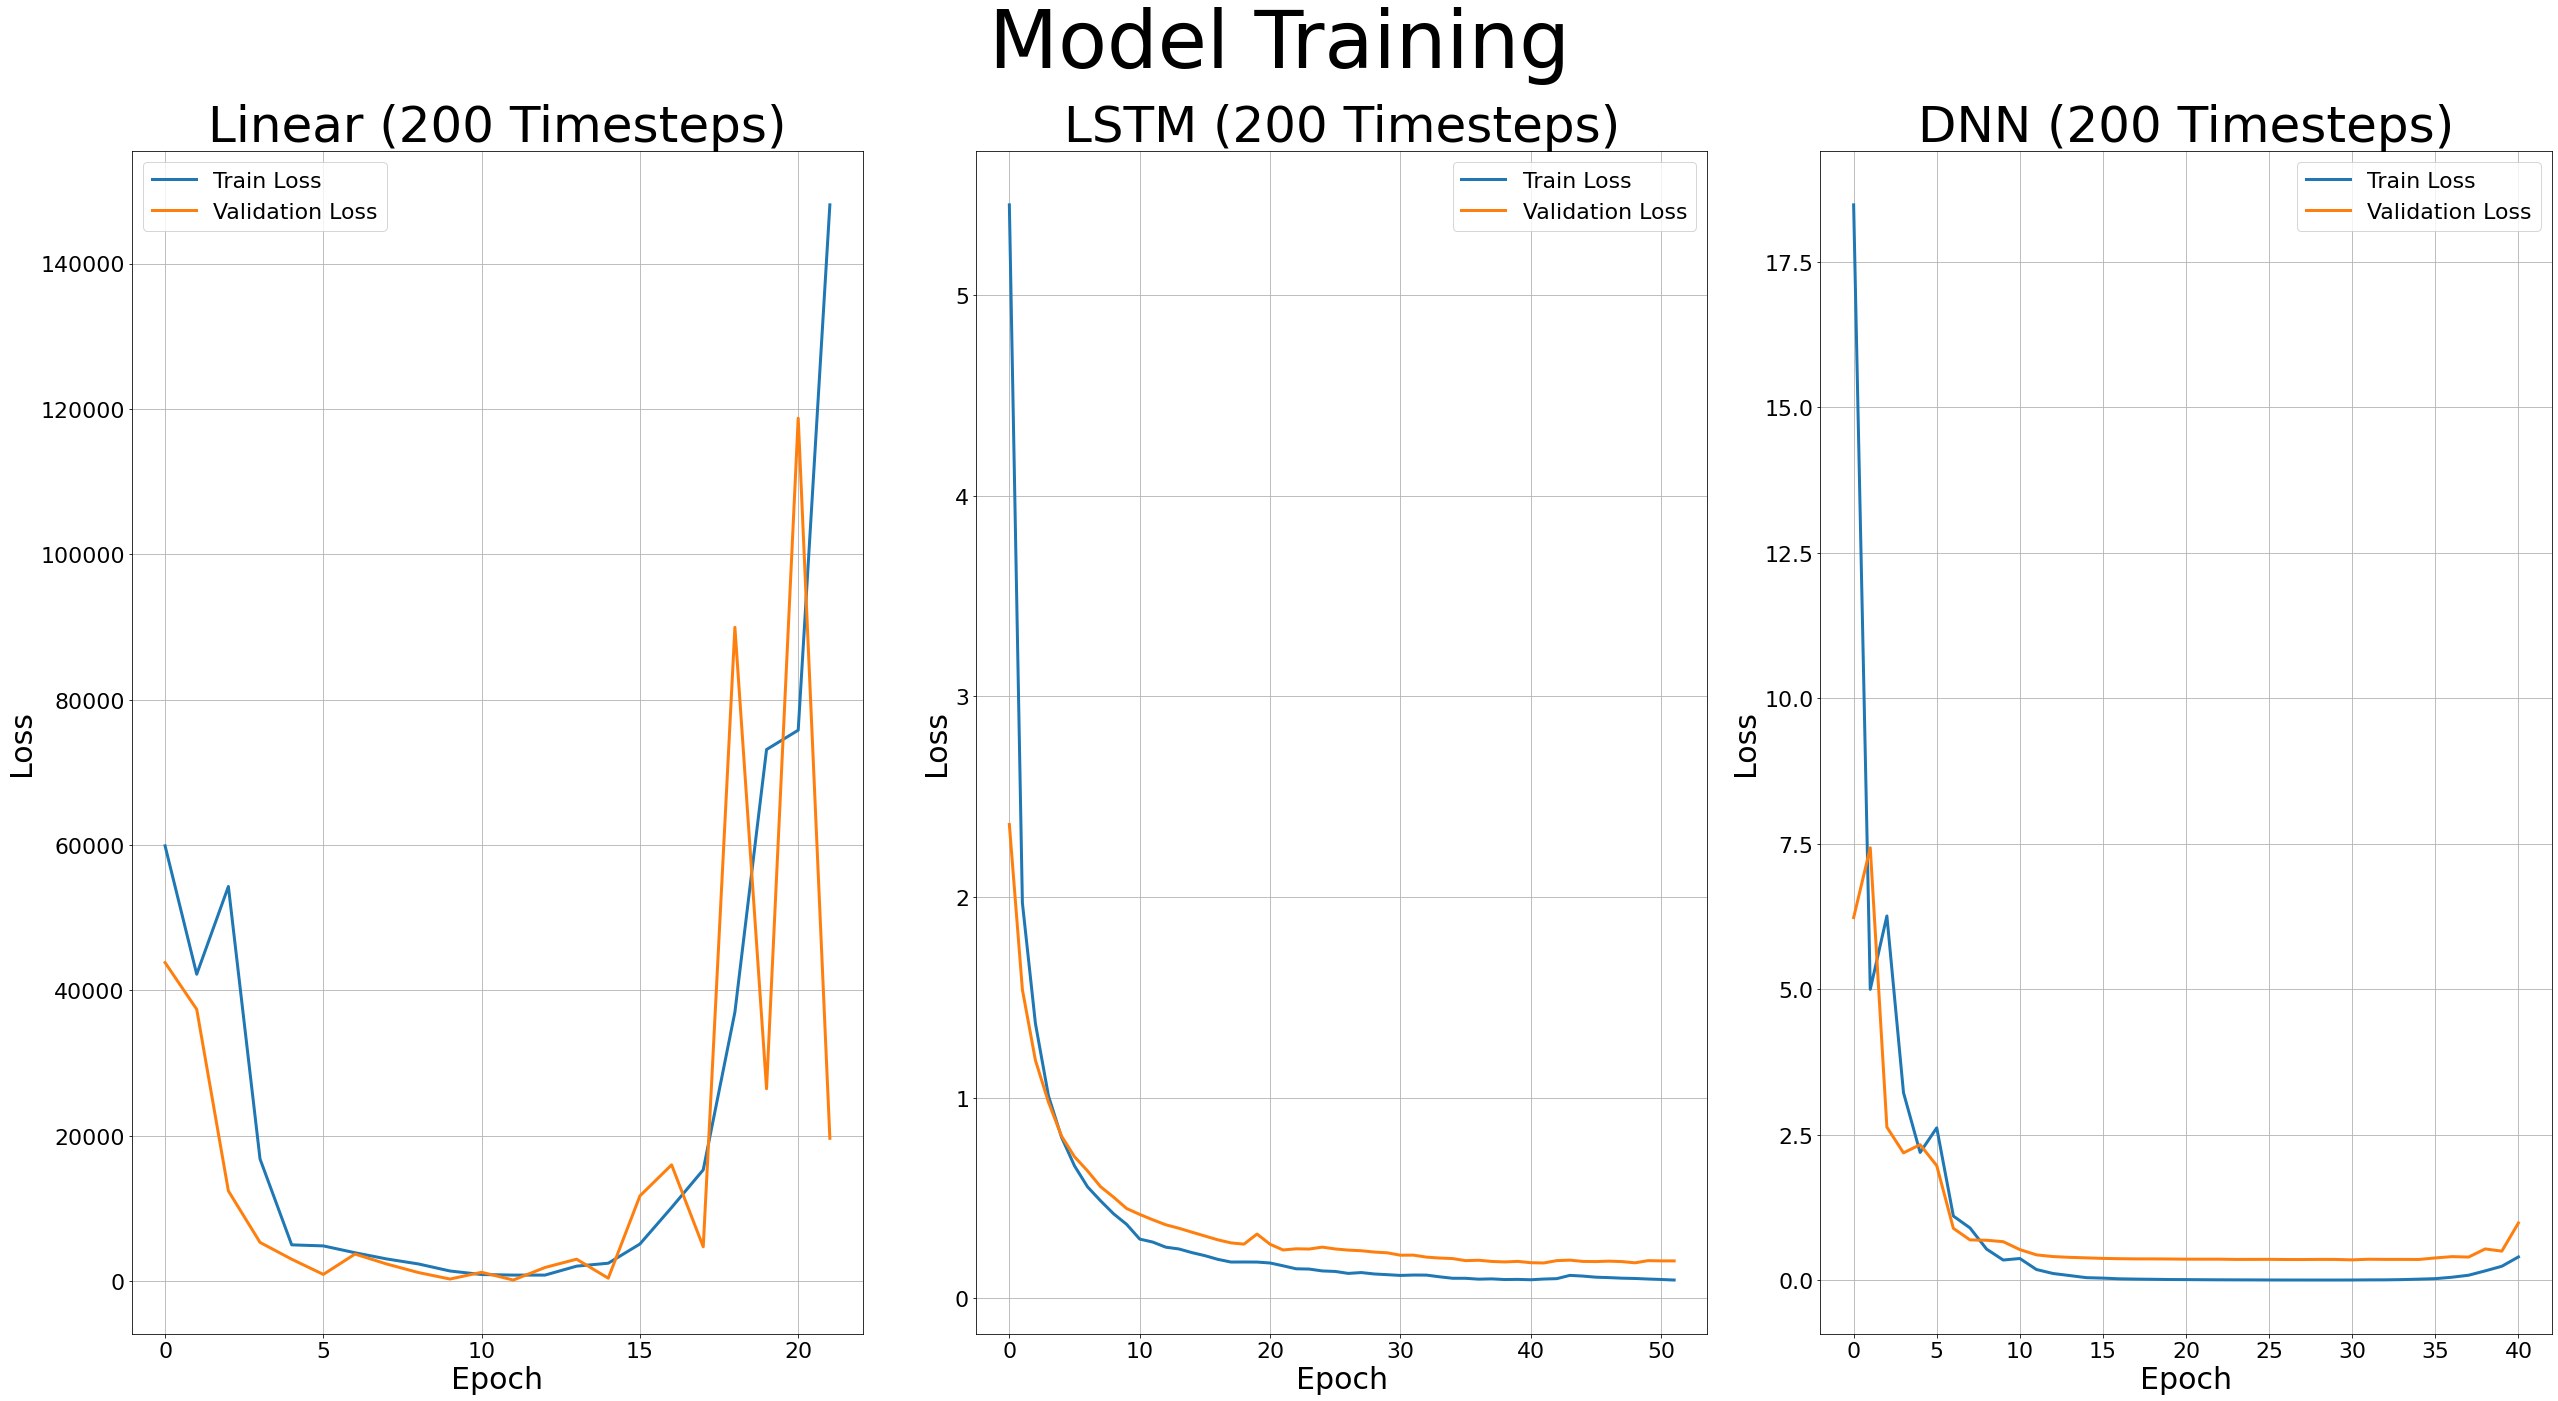

In [134]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, 
                                                     ncols=3, 
                                                     sharey=False, 
                                                     sharex=False,
                                                     figsize=(36,20))
fig.patch.set_facecolor('white')

for ax, hist, title in zip((ax0,ax1,ax2), ('linear_200','lstm_200','dnn_200'),
                           ('Linear (200 Timesteps)','LSTM (200 Timesteps)','DNN (200 Timesteps)')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    
fig.suptitle('Model Training', fontsize = 80)

plt.tight_layout()
plt.show()

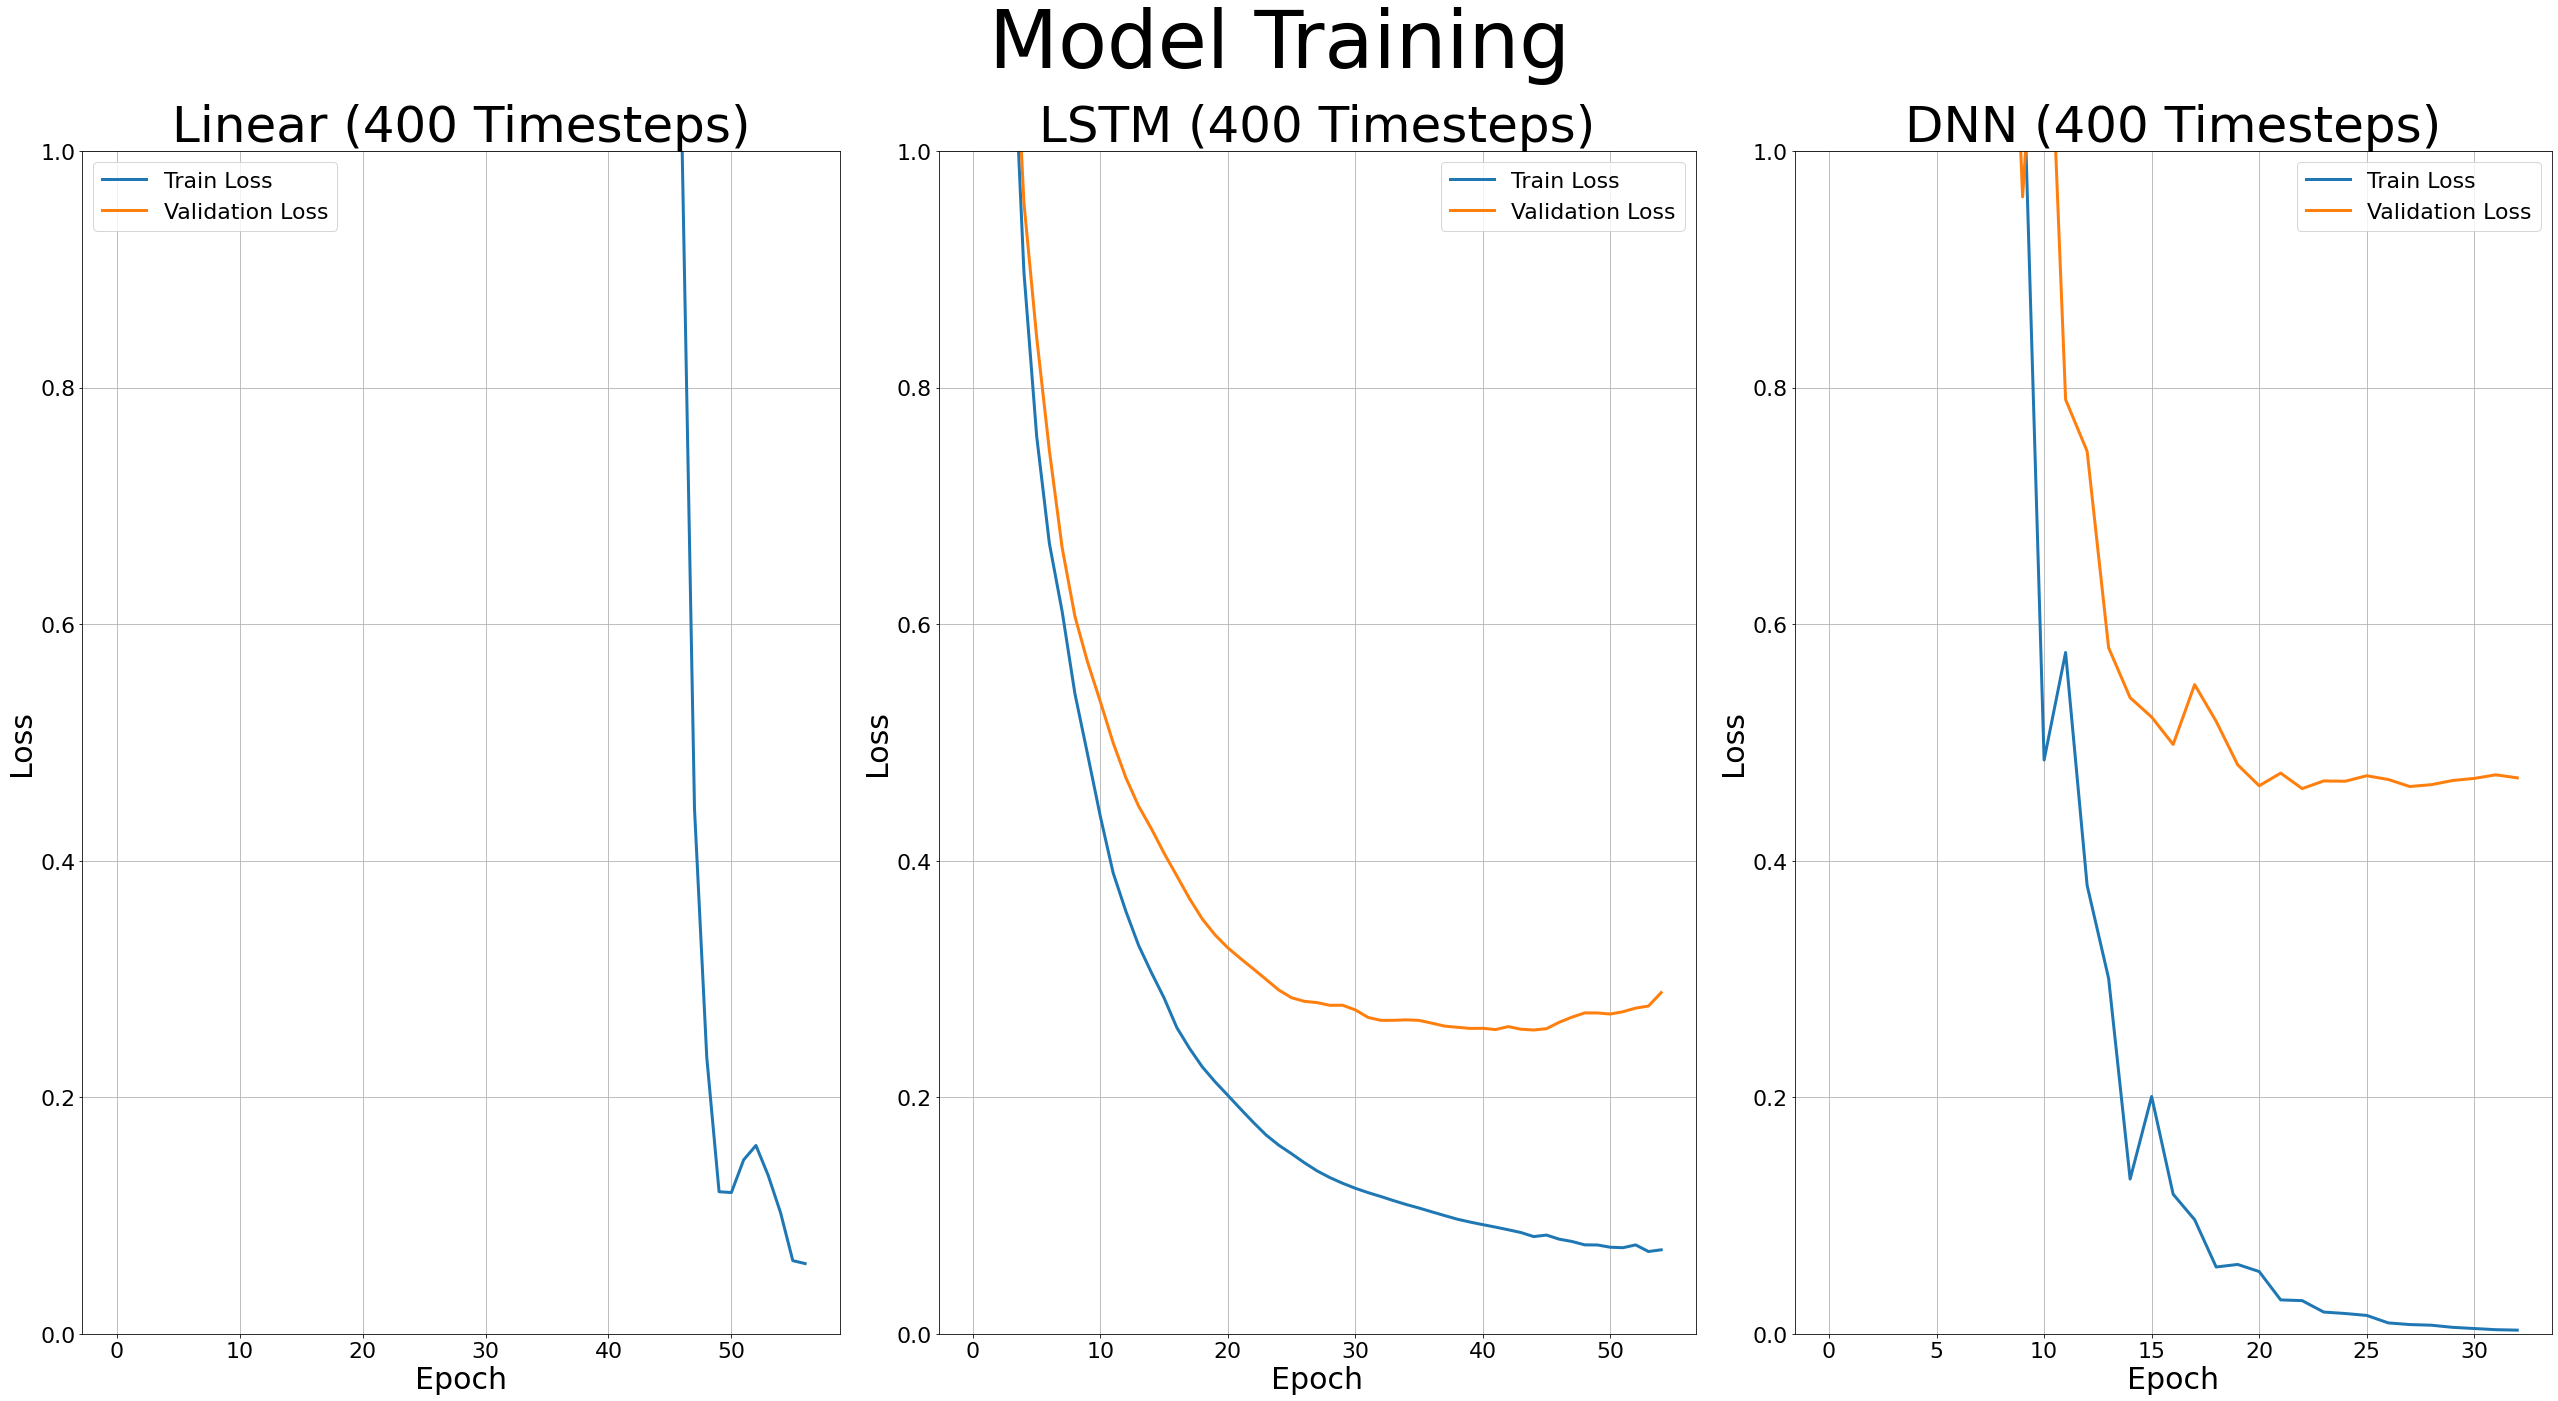

In [127]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, (ax0,ax1,ax2) = plt.subplots(nrows=1, 
                                                     ncols=3, 
                                                     sharey=False, 
                                                     sharex=False,
                                                     figsize=(36,20))
fig.patch.set_facecolor('white')

for ax, hist, title in zip((ax0,ax1,ax2), ('linear_400','lstm_400','dnn_400'),
                           ('Linear (400 Timesteps)','LSTM (400 Timesteps)','DNN (400 Timesteps)')):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim((0,1))
    
fig.suptitle('Model Training', fontsize = 80)

plt.tight_layout()
plt.show()